In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import SimpleITK as sitk
import json 
import os
from time import sleep

%load_ext autoreload
%autoreload 2

In [2]:
def crop_mri_sequence(img: np.ndarray, 
                      centroid, 
                      target_size):
        x_loc, y_loc, z_loc = centroid
        d_target, h_target, w_target = target_size
        z_loc_odd = d_target % 2 == 1
        
        current_image = img.take(
                                axis = 2,
                                indices = range(x_loc - int(w_target/2), x_loc + int(w_target/2)),
                                mode='wrap'
                            )

        current_image = current_image.take(
                                axis = 1,
                                indices = range(y_loc - int(h_target/2), y_loc + int(h_target/2)),
                                mode='wrap'
                            )
                            
        current_image = current_image.take(
                                axis = 0,
                                indices = range(z_loc - int(d_target/2), z_loc + int(d_target/2) + z_loc_odd),
                                mode='wrap'
                            )                            
        return current_image
    
def crop_centroidSlice(img, centroid, target_size):
        x_loc, y_loc, z_loc = centroid
        z_target, w_target, h_target = target_size
        # keep z slice
        img = img[z_loc]
        current_image = img.take(
                                axis = 1,
                                indices = range(x_loc - int(w_target/2), x_loc + int(w_target/2)),
                                mode='wrap'
                            )

        current_image = current_image.take(
                                axis = 0,
                                indices = range(y_loc - int(h_target/2), y_loc + int(h_target/2)),
                                mode='wrap'
                            )
                                                      
        return current_image
    
def plot_volumeAndCentroid(image_array,centroid, target_size):
    x_loc, y_loc, z_loc = centroid
    len_volume = image_array.shape[0]
    # Plot all the slices
    n_rows, n_columns = len_volume // 5 + 1, 5
    z_loc_odd = target_size[0] % 2 == 1
    
    print("-" * 20 + "VOLUME" + "-" * 20)
    fig, ax = plt.subplots(n_rows, n_columns, figsize=(n_columns * 3, n_rows * 3), sharex=True, sharey=True)
    for i in range(len_volume):
        ax[i // 5, i % 5].imshow(image_array[i], cmap='gray')
        ax[i // 5, i % 5].set_title(f"Slice {i}")
        if i == z_loc:
            ax[i // 5, i % 5].plot(x_loc, y_loc, 'x', markersize=8, color='red')
        # Plotting the bounding box
        if i >= z_loc - int(target_size[0] / 2) and i < z_loc + int(target_size[0] / 2) + z_loc_odd:
            rect = patches.Rectangle((x_loc - target_size[1] // 2, y_loc - target_size[2] // 2),
                                    target_size[1], target_size[2],
                                    linewidth=2, edgecolor='red', facecolor='none')
            ax[i // 5, i % 5].add_patch(rect)

    plt.tight_layout()
    plt.show()      

In [3]:
PATH_IMAGES = '/Datasets/PICAI_olmos/Task2308_prep_picai_baseline/imagesTr' 
PATH_SEG = '/Datasets/PICAI_olmos/Task2308_prep_picai_baseline/labelsTr'
PATH_GLAND = '/Datasets/PICAI_olmos/Task2308_prep_picai_baseline/labelsTr_bosma'

PATH_JSON_INFO = '/Datasets/PICAI_olmos/info-12x32x32.json'
#read json

with open(PATH_JSON_INFO, 'r') as f:
    info = json.load(f)

In [5]:
target_size = (12,32,32)

list_t2_Vols = []
list_adc_Vols = []
list_bval_Vols = []
labels = []
names = []

long = len(info)
i = 0
for k in info:
    name = str(k)
    names.append(name)
    centroid = info[name]['centroid']

    t2_array = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(PATH_IMAGES, f'{name}_0000.nii.gz')))
    adc_array = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(PATH_IMAGES, f'{name}_0001.nii.gz')))
    bval_array = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(PATH_IMAGES, f'{name}_0002.nii.gz')))

    t2_centerVolume = crop_mri_sequence(t2_array, centroid, target_size)
    adc_centerVolume = crop_mri_sequence(adc_array, centroid, target_size)
    bval_centerVolume = crop_mri_sequence(bval_array, centroid, target_size)

    #Save volumes as npys
    # np.save(f'/Datasets/PICAI_32_32_12_volumes/{name}_0000.npy', t2_centerVolume.transpose(1,2,0))
    # np.save(f'/Datasets/PICAI_32_32_12_volumes/{name}_0001.npy', adc_centerVolume.transpose(1,2,0))
    # np.save(f'/Datasets/PICAI_32_32_12_volumes/{name}_0002.npy', bval_centerVolume.transpose(1,2,0))

    #Print the shape of all arrays and volumes
    print(f"Name: {name}")
    print(f"Shape T2: {t2_array.shape}")
    print(f"Shape ADC: {adc_array.shape}")
    print(f"Shape BVAL: {bval_array.shape}")

    label = info[name]["case_ISUP"]
    labels.append(label)
    i = i+1
    #Print loading bar
    #print(f"Process {i}/{long}  - ({round((i/long)*100,3)}% done)", end="\r")
    sleep(0.1)
    

Name: 11107_1001130
Shape T2: (24, 384, 384)
Shape ADC: (24, 384, 384)
Shape BVAL: (24, 384, 384)
Name: 10078_1000078
Shape T2: (24, 384, 384)
Shape ADC: (24, 384, 384)
Shape BVAL: (24, 384, 384)
Name: 11244_1001267
Shape T2: (24, 384, 384)
Shape ADC: (24, 384, 384)
Shape BVAL: (24, 384, 384)
Name: 11024_1001044
Shape T2: (24, 384, 384)
Shape ADC: (24, 384, 384)
Shape BVAL: (24, 384, 384)
Name: 10798_1000814
Shape T2: (24, 384, 384)
Shape ADC: (24, 384, 384)
Shape BVAL: (24, 384, 384)
Name: 10604_1000618
Shape T2: (24, 384, 384)
Shape ADC: (24, 384, 384)
Shape BVAL: (24, 384, 384)
Name: 10716_1000732
Shape T2: (24, 384, 384)
Shape ADC: (24, 384, 384)
Shape BVAL: (24, 384, 384)
Name: 11357_1001380
Shape T2: (24, 384, 384)
Shape ADC: (24, 384, 384)
Shape BVAL: (24, 384, 384)
Name: 11287_1001310
Shape T2: (24, 384, 384)
Shape ADC: (24, 384, 384)
Shape BVAL: (24, 384, 384)
Name: 11470_1001494
Shape T2: (24, 384, 384)
Shape ADC: (24, 384, 384)
Shape BVAL: (24, 384, 384)
Name: 10116_1000116


KeyboardInterrupt: 

In [38]:
t2_centerVolume.max()

494

In [24]:
name = "11107_1001130"
centroid = info[name]['centroid']
target_size = (12,32,32)

t2_array = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(PATH_IMAGES, f'{name}_0000.nii.gz')))
adc_array = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(PATH_IMAGES, f'{name}_0001.nii.gz')))
bval_array = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(PATH_IMAGES, f'{name}_0002.nii.gz')))

t2_centerVolume = crop_mri_sequence(t2_array, centroid, target_size)
adc_centerVolume = crop_mri_sequence(adc_array, centroid, target_size)
bval_centerVolume = crop_mri_sequence(bval_array, centroid, target_size)

label = info[name]["case_ISUP"]

print(f"The shapes are: {t2_centerVolume.shape}, {adc_centerVolume.shape}, {bval_centerVolume.shape}")

The shapes are: (32, 32, 32), (32, 32, 32), (32, 32, 32)


In [ ]:
from skimage.transform import resize
def get_slices(arr):
    """
    Given an array of sice (32,32,12)
    gets the slices that go thru the centroid
    """
    s1 = arr[15,:,:]
    s2 = arr[:,15,:]
    s3 = arr[:,:,5]

    #Resize each slice to 224x224
    s1 = resize(s1, (224,224), anti_aliasing=True)
    s2 = resize(s2, (224,224), anti_aliasing=True)
    s3 = resize(s3, (224,224), anti_aliasing=True)

    #Repeat slices algon the 3rd axis
    s1 = np.repeat(s1[:,:,np.newaxis], 3, axis=2)
    s2 = np.repeat(s2[:,:,np.newaxis], 3, axis=2)
    s3 = np.repeat(s3[:,:,np.newaxis], 3, axis=2)

    return [s1, s2, s3]
    

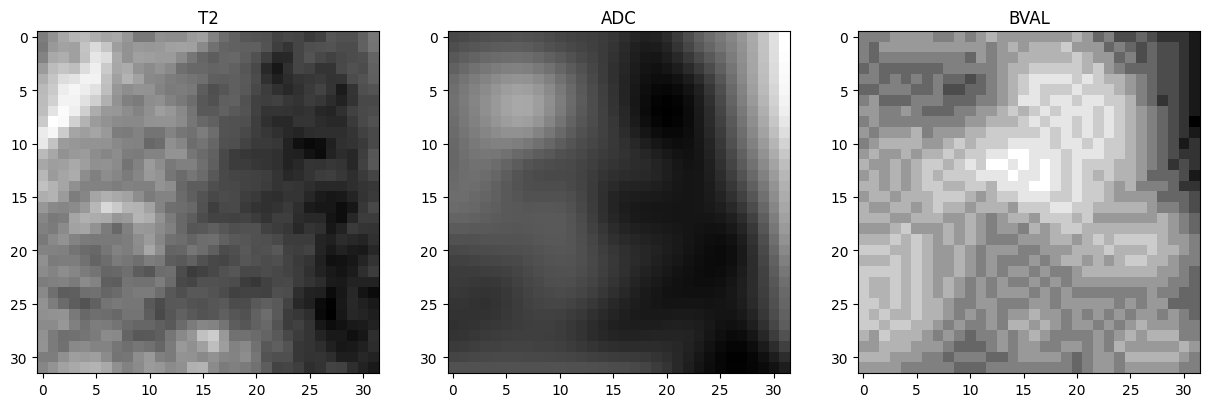

In [32]:
#Plot the slice ith slice in each using subplots

i = 0
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(t2_centerVolume[i,:,:], cmap='gray')
ax[0].set_title('T2')
ax[1].imshow(adc_centerVolume[i,:,:], cmap='gray')
ax[1].set_title('ADC')
ax[2].imshow(bval_centerVolume[i,:,:], cmap='gray')
ax[2].set_title('BVAL')
plt.show()


In [6]:
#Load VGG19 weights using tensorflow
import tensorflow as tf
from tensorflow.keras.applications import VGG19


#Load VGG19
input_shape = (224, 224, 3)
vgg19 = VGG19( weights='imagenet', input_shape=input_shape)

#Get activations of 4th layer
model = tf.keras.Model(inputs=vgg19.input, outputs=vgg19.get_layer('block1_pool').output)

#summary of model
model.summary()


2024-03-13 18:32:58.446360: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 18:33:13.878656: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-03-13 18:33:13.878728: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: 0c0fd205d412
2024-03-13 18:33:13.878736: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: 0c0fd205d412
2024-03-13 18:33:13.878821: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 545.23.6
2024-03-13 18:33:13.878843: I external/local_xla/xla

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 51s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,720 (151.25 KB)

 Trainable params: 38,720 (151.25 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#import pca
from sklearn.decomposition import PCA
from skimage.transform import resize


def get_acts(model, arr):
    """" arr is an array of size (32,32,n_channels)
        each channel should be repeated 3 times to match the input shape of the model
    """
    img = arr.transpose(1,2,0)[np.newaxis,:,:,:]
    img = np.repeat(img,3, axis=0).transpose(3,1,2,0)
    resized_img = np.empty((img.shape[0], 224, 224, 3))
    for i in range(img.shape[0]):
        resized_img[i] = resize(img[i], (224, 224, 3))

    img = resized_img

    img = tf.keras.applications.vgg19.preprocess_input(img)
    acts = model.predict(img, verbose=0)
    return acts

def get_spd_acts(acts1,acts2,acts3):
    # Vectorize de 0 and 3 axis of entries

    v1 = acts1.transpose(1,2,3,0).reshape(acts1.shape[1],acts.shape[2],-1)
    v2 = acts2.transpose(1,2,3,0).reshape(acts2.shape[1],acts.shape[2],-1)
    v3 = acts3.transpose(1,2,3,0).reshape(acts3.shape[1],acts.shape[2],-1)

    vtotal = np.concatenate((v1,v2,v3),axis=2)
    vtotal = vtotal.reshape(-1,vtotal.shape[2])
    cov = np.cov(vtotal.T)
    return cov


#Get activations for the 6th slice of the first volume
acts = get_acts(model, t2_centerVolume)





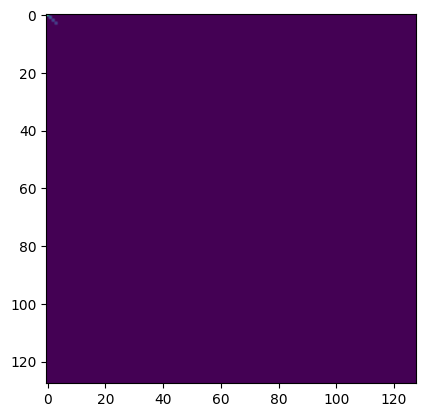

In [28]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

# Sort the eigenvectors by the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Select the first 128 eigenvectors
eigenvectors_reduced = eigenvectors[:, :128]

# Transform the covariance matrix to the reduced space
cov_reduced = np.real(eigenvectors_reduced.T @ cov @ eigenvectors_reduced)

plt.imshow(cov_reduced)

In [33]:
from time import sleep
i = 0

for t2_vol, adc_vol, bval_vol, name, label in zip(list_t2_Vols, list_adc_Vols, list_bval_Vols, names, labels):
    
    acts_t2 = get_acts(model, t2_vol)
    acts_adc = get_acts(model, adc_vol)
    acts_bval = get_acts(model, bval_vol)

    cov = get_spd_acts(acts_t2,acts_adc,acts_bval)   

    np.save(f"/Datasets/PICAI_covs_VGG19/covs/{name}.npy", cov)
    i = i+1
    #Print loading bar 
    print(f"Process {i}/{long}  - ({round((i/long)*100,3)}% done)", end="\r")
    sleep(0.15)
